<a href="https://colab.research.google.com/github/rbeauchamp12/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/11_6_Assignment_114_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline

In [0]:
#this will specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')

In [4]:
#this will show all the styles that are avaliable to us
plt.style.available

['seaborn-pastel',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-deep',
 'ggplot',
 'bmh',
 'seaborn-muted',
 'seaborn-talk',
 'seaborn-white',
 'seaborn',
 'seaborn-ticks',
 'seaborn-colorblind',
 'fast',
 'seaborn-notebook',
 'Solarize_Light2',
 'tableau-colorblind10',
 'fivethirtyeight',
 'seaborn-poster',
 'classic',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark',
 'grayscale',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-whitegrid']

In [6]:
#read in the titanic data set
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df=pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
#the cabin class is a categorical variable and can be displayed as a number or string value
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


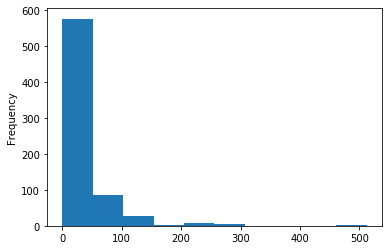

In [8]:
#Fare is a continuous variable and it now can be displayed as a histogram
df['Fare'].plot(kind='hist');

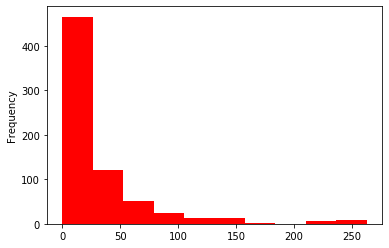

In [9]:
 #this will remove the extreme outliers and display under 500
 df=df[df['Fare'] <500]
 df['Fare'].plot(kind='hist', color='red');

In [11]:
#use binning to convert a continuous variable to a categorical variable
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high', 'vhigh'] #this will create the labels
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults =df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

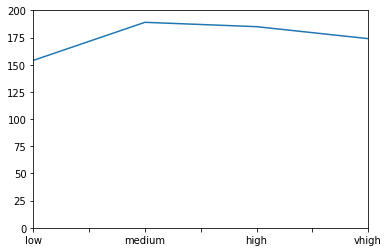

In [12]:
#use the 'lim' to set the limits (or y-axis range) to get more accurate results
myresults.plot(ylim=(0, 200)); #0 = x axis , 200 = y axis


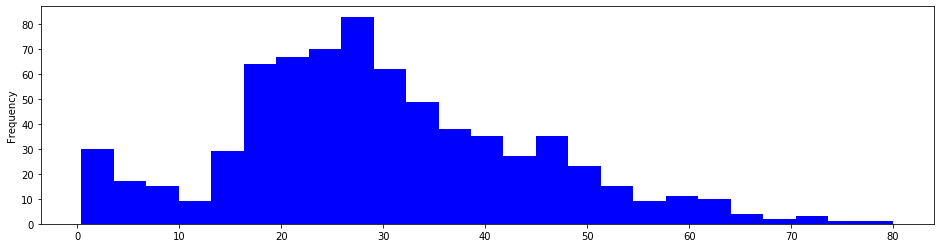

In [14]:
#creating a histogram
#bins equals the width of the bars
#figsize = the legth and width of the histogram
#color = color of the histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='blue');

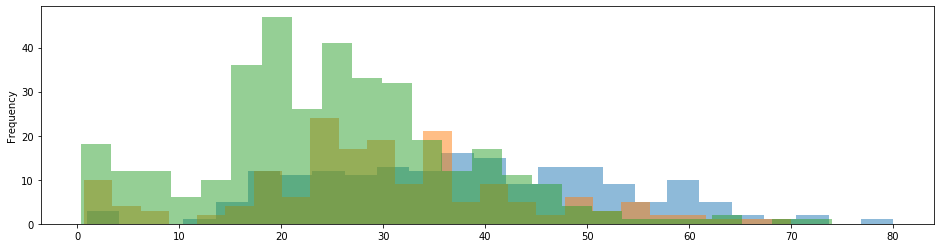

In [23]:
#stacking the histogram of continuous variables
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

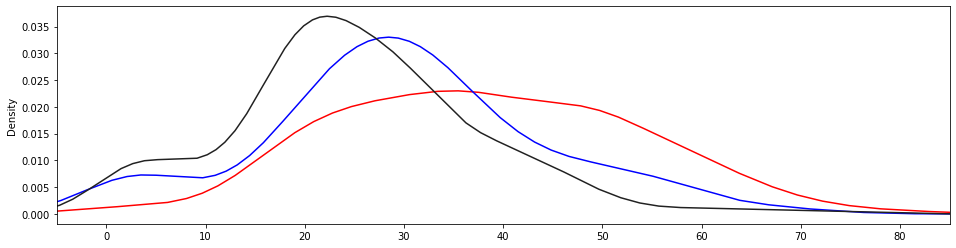

In [25]:
 #using the Kernel Density Estimate(KDE) to render the plots a bit easier
 #the KDE will show the graph as a lines instead of bars so that flow and show easier
 #be sure to use the xlim which will show the width of the line
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='red')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='blue')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='#212121');

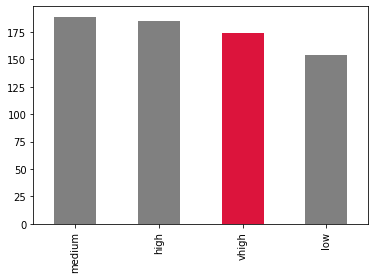

In [27]:
#Bar Charts
#when using bar charts it good to make the vital information stand out by using different colors for the key information and one color for the other
#the colors inside of the list will be display the same on the bar chart from left to right
#['grey'=bar1, 'grey'=bar2, 'crimson'=bar3, 'grey'=bar4]
df['fare_groups'].value_counts().plot(kind='bar', color=['grey', 'grey', 'crimson', 'grey']);

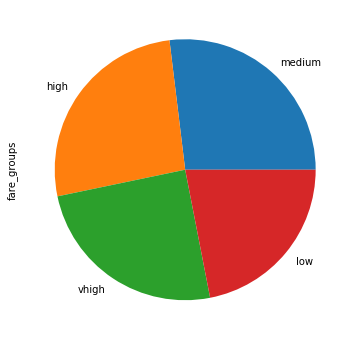

In [31]:
#pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(6,6));

In [33]:
#comparing two tables with crosstabs
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


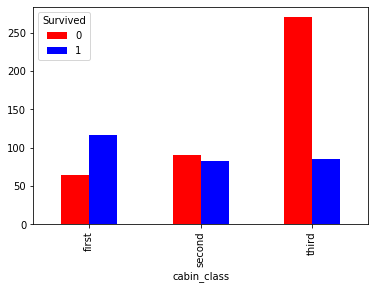

In [37]:
#creating a bar chart for two compare the two tables in the example above
#you can change the bars into colors other than the default colors which are orange and blue
cab_death.plot(kind='bar', color=['red', 'blue']);

In [39]:
#comparing crosstabs with column percents
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


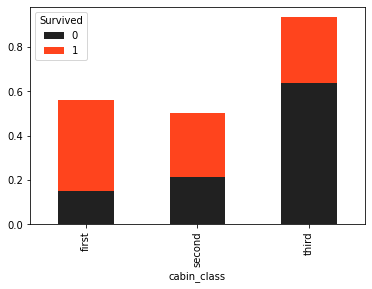

In [42]:
#stacking bar chart so that the two columns can be compared easily
#stacked=True will ensure that the columns are on top of eachother
#stacked=False will show the columns side by side
cab_death1.plot(kind='bar', stacked=True, color=['#212121', '#ff441d']);

In [45]:
#crosstab with column percents example 2
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


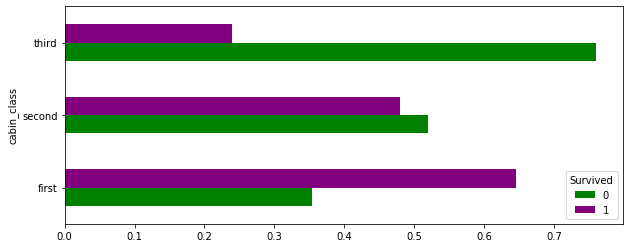

In [48]:
#a paired barchart that compares two categorial variables
#kind='barh' will create horizontal bars
#use the stacked option to join the bar charts together
cab_death2.plot(kind='barh', color=['green', 'purple'], figsize=(10, 4));

In [49]:
#checking on a single continuous variable
'''mean function is used to calculate the arithmetic mean of a given 
set of numbers, mean of a data frame, mean of column and mean of rows'''
df['Age'].mean()

29.618011283497882

In [50]:
#break out the continuous variables by a categorical variable
#use the groupby function to get the mean or the sum of a group
#the groupby example shows the average ['Age'] of the passengers in these classes: first class, second class, and third class

cab_age =df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

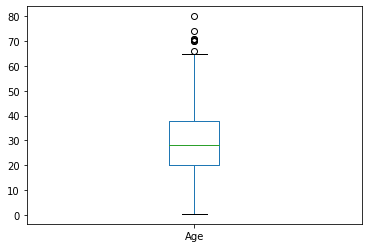

In [51]:
#to visualize a single continuous variable 
#use .plot with the kind='box
df['Age'].plot(kind='box');

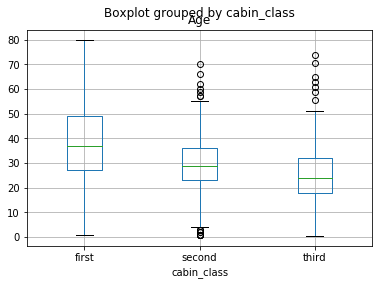

In [52]:
#break out a continous variable by a categorical variable, use.boxplot

df.boxplot(column='Age', by='cabin_class');

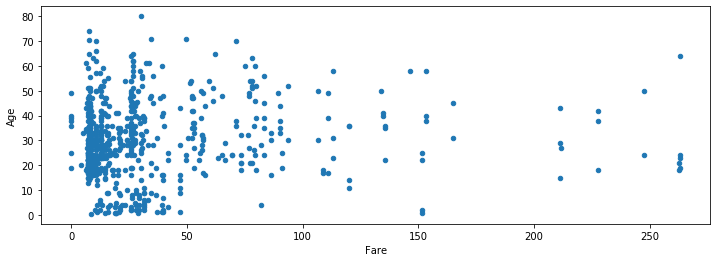

In [63]:
#showing two continuous variables
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

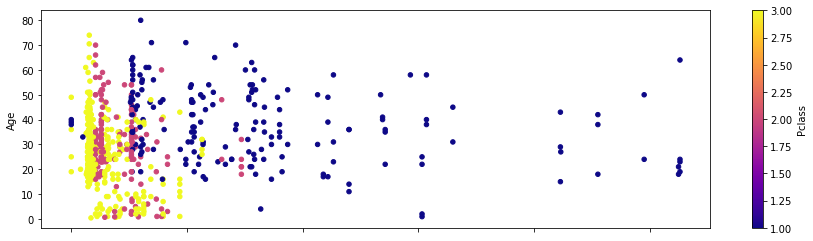

In [64]:
# Three variables to show: age, fare, cabin class 
#the colors can be either continuous or categorical 
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

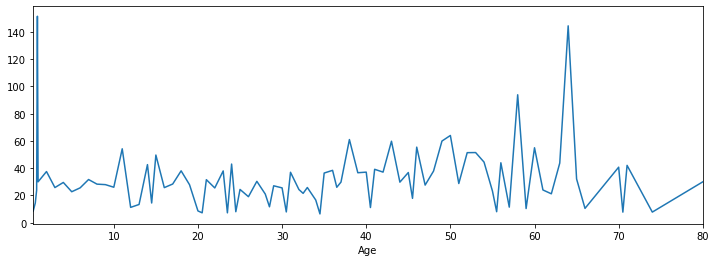

In [69]:
#line charts
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

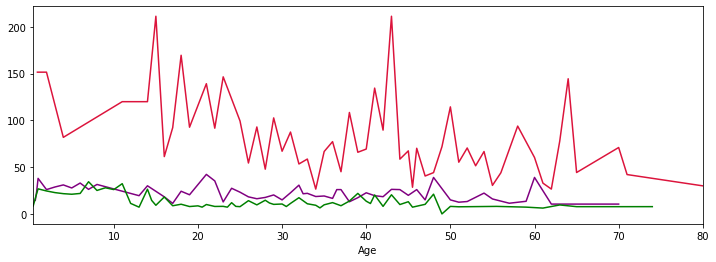

In [70]:
#line chart with different colors for each class
#create a list of colors
mycolors=['crimson', 'purple', 'green']
#loop the values of the plot instead of specifying 3 separate plots with a for loop
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [71]:
#correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


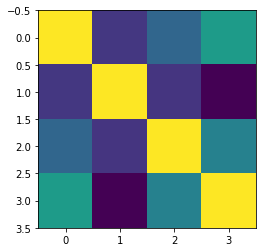

In [72]:
#displaying the example above as a heatmap
plt.imshow(corr_matrix);

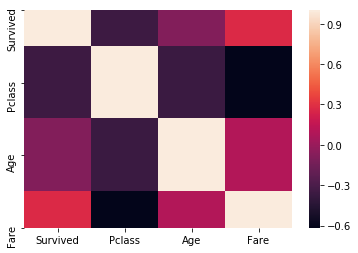

In [73]:
#use seaborn to show a cleaner and better version of the matrix heatmap
sns.heatmap(corr_matrix);

In [0]:
#matplotlib
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [77]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [78]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

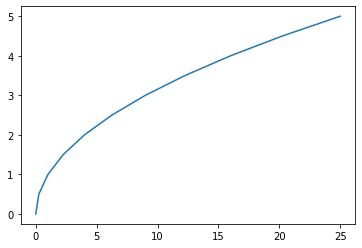

In [79]:
#basic matplotlib command
plt.plot(y,x);

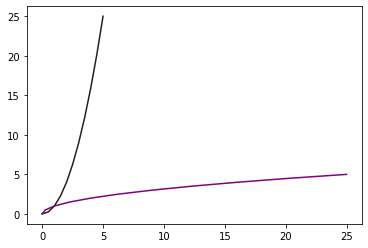

In [85]:
#you can have two plots on the same chart 
#add color by adding the first letter of the color, the full color name, or hexcode
plt.plot(x,y, '#212121')
plt.plot(y,x, 'purple');

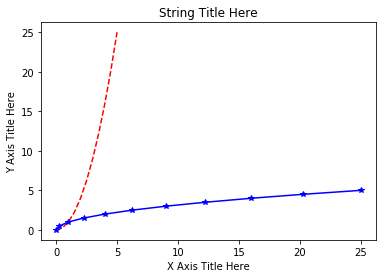

In [90]:
#add labels and some texture to the lines
#add texture to by signifying the type next to the color code: *- , -- 
plt.plot(x,y, 'r--')
plt.plot(y,x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

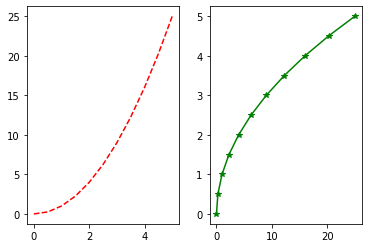

In [92]:
#create multiplots on the same canvas
# the basic syntax is plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x,y, 'r--')
plt.subplot(1,2,2)
plt.plot(y,x, 'g*-');

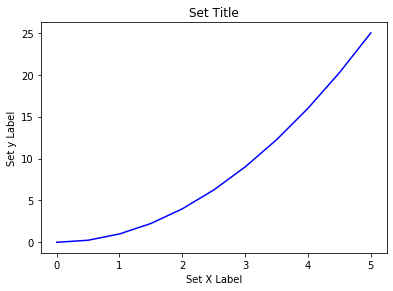

In [107]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title');

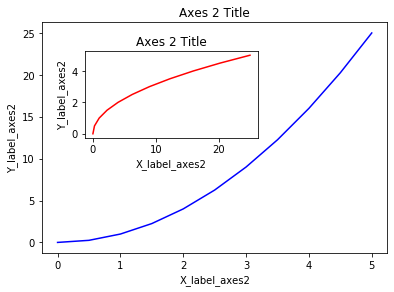

In [106]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

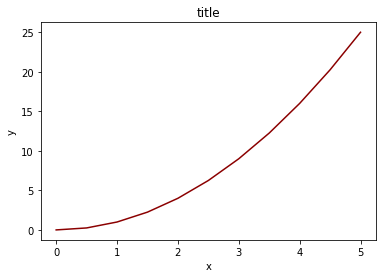

In [105]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
# The default is `(1, 1)` so you don't actually have to specify this.
fig, axes = plt.subplots(nrows=1, ncols=1) 
# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

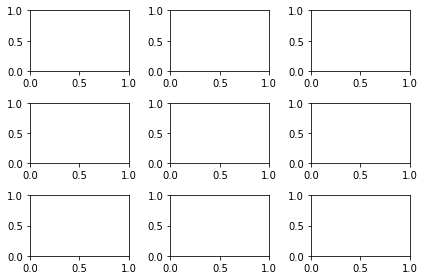

In [104]:
# Empty canvas of 1 by 2 subplots
# the parameter labels `nrows` and `ncols` are optional.
fig, axes = plt.subplots(nrows=3, ncols=3)
# more about `.tight_layout()` below.
fig    
plt.tight_layout() 

In [98]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7ebb5cf60>,
      dtype=object)

In [0]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

In [99]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

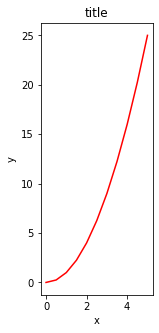

In [100]:
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
#save the figure 
fig.savefig("filename.png")

In [0]:
#specify the DPI and choose between the differnt ouput formatss
fig.savefig("filename.jpg", dpi=200)

In [0]:
#set the title of the figure
ax.set_title("title_name");

In [0]:
#axis label
ax.set_xlabel("x")
ax.set_ylabel("y");

In [0]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

In [0]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Try replacing the `loc` value with integers 1 through 10.
ax.legend() # let matplotlib decide the optimal location
fig

In [0]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

In [0]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code

In [0]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here